In [292]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [293]:
house_price_dataset = pd.read_csv(r"C:\Users\point\Desktop\Housing.csv")

In [294]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [295]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [296]:
house_price_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [297]:
house_price_dataframe.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [298]:
#statistical measures
house_price_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [299]:
#changing categorical data into numerical data
house_price_dataframe['mainroad'] = house_price_dataframe['mainroad'].replace("yes", 1)
house_price_dataframe['guestroom'] = house_price_dataframe['guestroom'].replace("yes", 1)
house_price_dataframe['basement'] = house_price_dataframe['basement'].replace("yes", 1)
house_price_dataframe['hotwaterheating'] = house_price_dataframe['hotwaterheating'].replace("yes", 1)
house_price_dataframe['airconditioning'] = house_price_dataframe['airconditioning'].replace("yes", 1)
house_price_dataframe['prefarea'] = house_price_dataframe['prefarea'].replace("yes", 1)
house_price_dataframe['mainroad'] = house_price_dataframe['mainroad'].replace("no", 0)
house_price_dataframe['guestroom'] = house_price_dataframe['guestroom'].replace("no", 0)
house_price_dataframe['basement'] = house_price_dataframe['basement'].replace("no", 0)
house_price_dataframe['hotwaterheating'] = house_price_dataframe['hotwaterheating'].replace("no", 0)
house_price_dataframe['airconditioning'] = house_price_dataframe['airconditioning'].replace("no", 0)
house_price_dataframe['prefarea'] = house_price_dataframe['prefarea'].replace("no", 0)
house_price_dataframe['furnishingstatus'] = house_price_dataframe['furnishingstatus'].replace("furnished", 1)
house_price_dataframe['furnishingstatus'] = house_price_dataframe['furnishingstatus'].replace("semi-furnished", 1)
house_price_dataframe['furnishingstatus'] = house_price_dataframe['furnishingstatus'].replace("unfurnished", 0)
house_price_dataframe.head()

C:\Users\point\AppData\Local\Temp\ipykernel_4300\3462377821.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_price_dataframe['mainroad'] = house_price_dataframe['mainroad'].replace("no", 0)
C:\Users\point\AppData\Local\Temp\ipykernel_4300\3462377821.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_price_dataframe['guestroom'] = house_price_dataframe['guestroom'].replace("no", 0)
C:\Users\point\AppData\Local\Temp\ipykernel_4300\3462377821.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [300]:
correlation = house_price_dataframe.corr()

<Axes: >

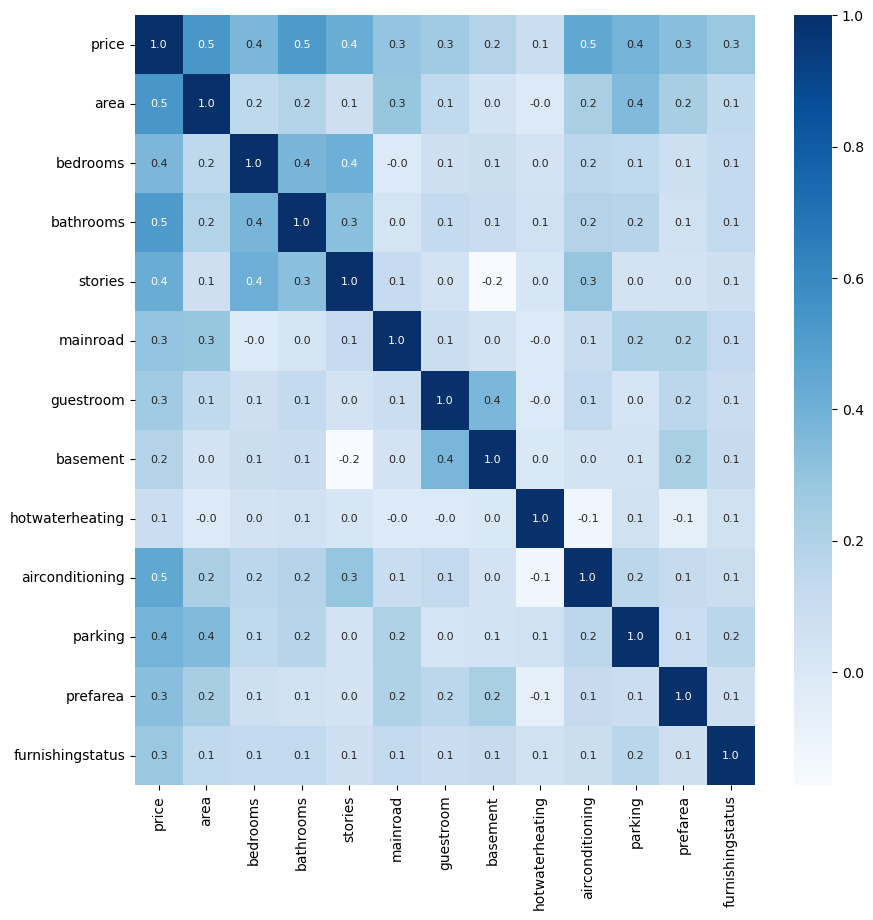

In [301]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [302]:
#splitting the data and target
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [303]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [304]:
#splitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [305]:
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


In [306]:
#model training
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [307]:
#evaluation on training data
training_data_prediction = model.predict(X_train)

In [308]:
print(training_data_prediction)

[ 3433003.8  4239316.   2658265.8  4751648.5  4137309.8  6945467.
  2887457.2  2695068.8  6925557.   4684112.   3320744.5  2891228.
  6027497.   5811274.   7731971.   4136187.8  5230460.5  4550351.
  7798631.5  4208851.   4126638.8  2692613.   5269291.   4396254.
  3906462.2  4024514.8  6805943.5  9199757.   4557305.   3210199.
  3787776.   3064679.8  2347381.5  4028838.2  4224584.   2701185.8
  4754052.   3661935.5  1938403.2  7988319.5  4195575.5 12235265.
  8546833.   7380560.5  4061928.   3167039.   4271557.5  3546974.8
  3357730.8  2517265.5  5880009.5  4112227.2  3863738.5  3206720.
  4072735.5  5326602.5  3645575.5  3793774.5  3637325.8  4154882.8
  7476372.5  4317627.5  5939181.   2962903.   3794748.   5504757.5
  6610562.5  5763058.5  5404968.   5567266.   3233979.5  3655594.5
  2848426.2  4828202.5  5266941.5  3694527.   5819005.5  4139676.5
  6717312.5  5392598.   3093356.2  3608260.5  6642768.   4875797.5
  5856185.5  8404761.   2711269.8  3263678.   9768448.   4097658.2
  

In [309]:
#r squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

print("r squared error :", score_1)

r squared error : 0.9971245453691647


In [310]:
#evaluation on test data
test_data_prediction = model.predict(X_test)

In [311]:
#r squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

print("r squared error :", score_1)

r squared error : 0.4636604462063473


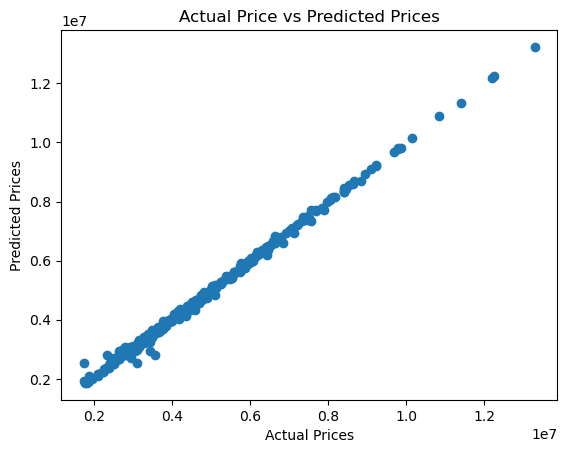

In [332]:
#visualizing actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()